|<div style="width:330px"><img src="https://www.ufz.de/static/custom/weblayout/DefaultInternetLayout/img/logos/ufz_transparent_de_blue.png" width="300"/></div>|<div style="width:290px"><img src="https://discourse.opengeosys.org/uploads/default/original/1X/a288c27cc8f73e6830ad98b8729637a260ce3490.png" width="290"/></div>|<div style="width:330px"><img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png" width="300"/></div>|
|---|---|--:|

Prepared by: Thomas Nagel \& Mehran Ghasabeh

Comments to:

*Prof. Dr. Thomas Nagel
\&
Mehran Ghasabeh*

*Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics

In [1]:
from ogs6py.ogs import OGS
import vtuIO
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ogstools as ot
import matplotlib.pyplot as plt
# ot.status(verbose=True)
%run plot_settings.py

In [2]:
betas = np.linspace(0, np.pi / 2, 90)

## Ubiquitous Joint Model (Weakness Plane Model) with rotation of local coordinate system and iterative solution

In [3]:
UCS_ubi_e0_iter   = np.array([])
epWP_ubi_e0_iter  = np.array([])

pts = {"pt0": (0.0,0.0,0.0)}

for i in betas:
    angle = int(np.round(i*180/np.pi,0))
    #print("Generating input for %i °" %angle)
    ofile="triax_" + str(angle) + ".prj"
    model = OGS(INPUT_FILE="triax_original_ubi_e0_iter.prj", PROJECT_FILE=ofile, ogs_mode="silent")
    model.replace_text('%.16f %.16f' %(np.cos(i),np.sin(i)), xpath="./parameters/parameter[name='e0']/values")
    model.replace_text('%.16f %.16f' %(-np.sin(i),np.cos(i)), xpath="./parameters/parameter[name='e1']/values")
    model.write_input()
    #
    print("Running simulation")
    model.run_model(path='~/build/release/bin')
    #
    print("Getting results")
    pvd = vtuIO.PVDIO("triax_0.pvd", dim=2)
    results = {}
    results["AxialStress"] = pvd.read_time_series("sigma", pts=pts)
    ucs_ubi_e0_iter = results['AxialStress']['pt0'].T[1][-1]
    UCS_ubi_e0_iter = np.append(UCS_ubi_e0_iter,-ucs_ubi_e0_iter)
    #
    results["epWP"] = pvd.read_time_series("EquivalentPlasticStrainWP", pts=pts)
    epWP_ubi_e0_iter = np.append(epWP_ubi_e0_iter,results['epWP']['pt0'][-1])
    #
    print("Removing created input")
    !rm $ofile
print("Removing output")
delstr = 'triax_0_ts*.vtu triax_*.pvd'
!rm $delstr

Running simulation
OGS finished with project file triax_0.prj.
Execution took 0.09520459175109863 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_1.prj.
Execution took 0.09442281723022461 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_2.prj.
Execution took 0.09998917579650879 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_3.prj.
Execution took 0.09750866889953613 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_4.prj.
Execution took 0.09866666793823242 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_5.prj.
Execution took 0.09588503837585449 s
Project file written to output.
Getting resul

## Ubiquitous Joint Model (Weakness Plane Model) with rotation of local coordinate system and non-iterative solution

In [4]:
UCS_ubi_e0_niter  = np.array([])
epWP_ubi_e0_niter = np.array([])

pts = {"pt0": (0.0,0.0,0.0)}

for i in betas:
    angle = int(np.round(i*180/np.pi,0))
    #print("Generating input for %i °" %angle)
    ofile="triax_" + str(angle) + ".prj"
    model = OGS(INPUT_FILE="triax_original_ubi_e0_niter.prj", PROJECT_FILE=ofile, ogs_mode="silent")
    model.replace_text('%.16f %.16f' %(np.cos(i),np.sin(i)), xpath="./parameters/parameter[name='e0']/values")
    model.replace_text('%.16f %.16f' %(-np.sin(i),np.cos(i)), xpath="./parameters/parameter[name='e1']/values")
    model.write_input()
    #
    print("Running simulation")
    model.run_model(path='~/build/release/bin')
    #
    print("Getting results")
    pvd = vtuIO.PVDIO("triax_0.pvd", dim=2)
    results = {}
    results["AxialStress"] = pvd.read_time_series("sigma", pts=pts)
    ucs_ubi_e0_niter = results['AxialStress']['pt0'].T[1][-1]
    UCS_ubi_e0_niter = np.append(UCS_ubi_e0_niter,-ucs_ubi_e0_niter)
    #
    results["epWP"] = pvd.read_time_series("EquivalentPlasticStrainWP", pts=pts)
    epWP_ubi_e0_niter = np.append(epWP_ubi_e0_niter,results['epWP']['pt0'][-1])
    #
    print("Removing created input")
    !rm $ofile
print("Removing output")
delstr = 'triax_0_ts*.vtu triax_*.pvd'
!rm $delstr

Running simulation
OGS finished with project file triax_0.prj.
Execution took 0.09628057479858398 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_1.prj.
Execution took 0.09110546112060547 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_2.prj.
Execution took 0.09882783889770508 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_3.prj.
Execution took 0.09264159202575684 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_4.prj.
Execution took 0.09421324729919434 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_5.prj.
Execution took 0.0995323657989502 s
Project file written to output.
Getting result

## Ubiquitous Joint Model (Weakness Plane Model) with rotation of fracture normals and iterative solution

In [5]:
UCS_ubi_n_iter= np.array([])
epWP_ubi_n_iter = np.array([])

pts = {"pt0": (0.0,0.0,0.0)}

for i in betas:
    angle = int(np.round(i*180/np.pi,0))
    #print("Generating input for %i °" %angle)
    ofile="triax_" + str(angle) + ".prj"
    model = OGS(INPUT_FILE="triax_original_ubi_n_iter.prj", PROJECT_FILE=ofile, ogs_mode="silent")
    model.replace_text('%.16f' %(np.cos(i)),  xpath="./parameters/parameter[name='normals[0]']/value")
    model.replace_text('%.16f' %(np.sin(i)),  xpath="./parameters/parameter[name='normals[1]']/value")
    model.replace_text('%.16f' %(0.), xpath="./parameters/parameter[name='normals[2]']/value")
    model.write_input()
    #
    print("Running simulation")
    model.run_model(path='~/build/release/bin')
    #
    print("Getting results")
    pvd = vtuIO.PVDIO("triax_0.pvd", dim=2)
    results = {}
    results["AxialStress"] = pvd.read_time_series("sigma", pts=pts)
    ucs_ubi_n_iter = results['AxialStress']['pt0'].T[1][-1]
    UCS_ubi_n_iter = np.append(UCS_ubi_n_iter,-ucs_ubi_n_iter)
    #
    results["epWP"] = pvd.read_time_series("EquivalentPlasticStrainWP", pts=pts)
    epWP_ubi_n_iter = np.append(epWP_ubi_n_iter,results['epWP']['pt0'][-1])
    #
    print("Removing created input")
    !rm $ofile
print("Removing output")
delstr = 'triax_0_ts*.vtu triax_*.pvd'
!rm $delstr

Running simulation
OGS finished with project file triax_0.prj.
Execution took 0.09449124336242676 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_1.prj.
Execution took 0.0980377197265625 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_2.prj.
Execution took 0.09135675430297852 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_3.prj.
Execution took 0.09556007385253906 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_4.prj.
Execution took 0.09990954399108887 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_5.prj.
Execution took 0.10189390182495117 s
Project file written to output.
Getting result

## Ubiquitous Joint Model (Weakness Plane Model) with rotation of fracture normals and non-iterative solution

In [6]:
UCS_ubi_n_niter= np.array([])
epWP_ubi_n_niter = np.array([])

pts = {"pt0": (0.0,0.0,0.0)}

for i in betas:
    angle = int(np.round(i*180/np.pi,0))
    #print("Generating input for %i °" %angle)
    ofile="triax_" + str(angle) + ".prj"
    model = OGS(INPUT_FILE="triax_original_ubi_n_niter.prj", PROJECT_FILE=ofile, ogs_mode="silent")
    model.replace_text('%.16f' %(np.cos(i)),  xpath="./parameters/parameter[name='normals[0]']/value")
    model.replace_text('%.16f' %(np.sin(i)),  xpath="./parameters/parameter[name='normals[1]']/value")
    model.replace_text('%.16f' %(0.), xpath="./parameters/parameter[name='normals[2]']/value")
    model.write_input()
    #
    print("Running simulation")
    model.run_model(path='~/build/release/bin')
    #
    print("Getting results")
    pvd = vtuIO.PVDIO("triax_0.pvd", dim=2)
    results = {}
    results["AxialStress"] = pvd.read_time_series("sigma", pts=pts)
    ucs_ubi_n_niter = results['AxialStress']['pt0'].T[1][-1]
    UCS_ubi_n_niter = np.append(UCS_ubi_n_niter,-ucs_ubi_n_niter)
    #
    results["epWP"] = pvd.read_time_series("EquivalentPlasticStrainWP", pts=pts)
    epWP_ubi_n_niter = np.append(epWP_ubi_n_niter,results['epWP']['pt0'][-1])
    #
    print("Removing created input")
    !rm $ofile
print("Removing output")
delstr = 'triax_0_ts*.vtu triax_*.pvd'
!rm $delstr

Running simulation
OGS finished with project file triax_0.prj.
Execution took 0.10336732864379883 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_1.prj.
Execution took 0.10911989212036133 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_2.prj.
Execution took 0.09293317794799805 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_3.prj.
Execution took 0.0965728759765625 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_4.prj.
Execution took 0.0971975326538086 s
Project file written to output.
Getting results
Removing created input
Running simulation
OGS finished with project file triax_5.prj.
Execution took 0.09442687034606934 s
Project file written to output.
Getting results

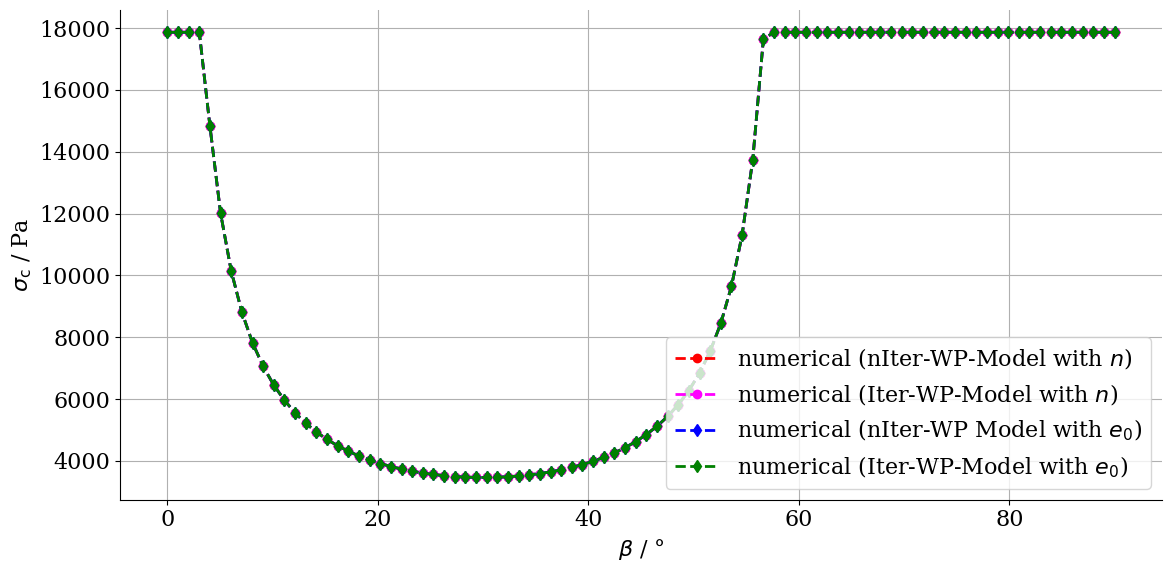

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(
    np.rad2deg(betas)[: len(UCS_ubi_n_niter)],
    UCS_ubi_n_niter,
    marker="o",
    ls="--",
    color="red",
    label="numerical (nIter-WP-Model with $n$) ",
)
ax.plot(
    np.rad2deg(betas)[: len(UCS_ubi_n_iter)],
    UCS_ubi_n_iter,
    marker="o",
    ls="--",
    color="magenta",
    label="numerical (Iter-WP-Model with $n$) ",
)
ax.plot(
    np.rad2deg(betas)[: len(UCS_ubi_e0_niter)],
    UCS_ubi_e0_niter,
    marker="d",
    ls="--",
    color="blue",
    label="numerical (nIter-WP Model with $e_0$)",
)
ax.plot(
    np.rad2deg(betas)[: len(UCS_ubi_e0_iter)],
    UCS_ubi_e0_iter,
    marker="d",
    ls="--",
    color="green",
    label="numerical (Iter-WP-Model with $e_0$)",
)
ax.set_xlabel("$\\beta$ / °")
ax.set_ylabel("$\\sigma_\\mathrm{c}$ / Pa")
ax.legend(loc="lower right")
plt.savefig("sigc_beta.png", bbox_inches="tight")
ax.grid(True)
fig.tight_layout()

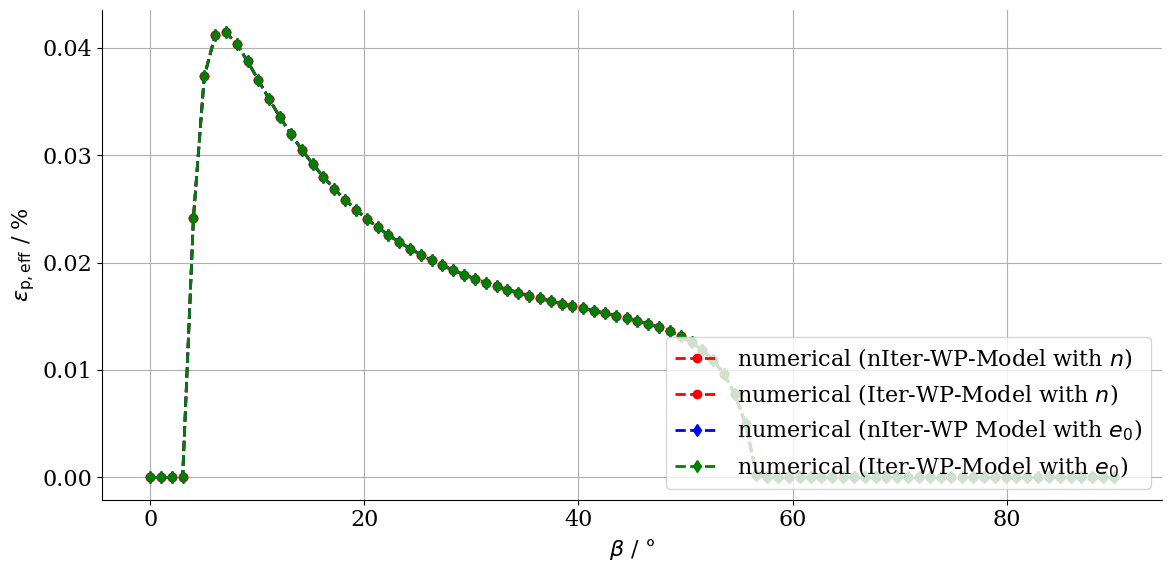

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(
    np.rad2deg(betas)[: len(UCS_ubi_e0_niter)],
    epWP_ubi_e0_niter * 1e2,
    marker="o",
    ls="--",
    color="red",
    label="numerical (nIter-WP-Model with $n$) ",
)
ax.plot(
    np.rad2deg(betas)[: len(UCS_ubi_e0_iter)],
    epWP_ubi_e0_iter * 1e2,
    marker="o",
    ls="--",
    color="red",
    label="numerical (Iter-WP-Model with $n$) ",
)
ax.plot(
    np.rad2deg(betas)[: len(UCS_ubi_n_iter)],
    epWP_ubi_n_iter * 1e2,
    marker="d",
    ls="--",
    color="blue",
    label="numerical (nIter-WP Model with $e_0$)",
)
ax.plot(
    np.rad2deg(betas)[: len(UCS_ubi_n_niter)],
    epWP_ubi_n_niter * 1e2,
    marker="d",
    ls="--",
    color="green",
    label="numerical (Iter-WP-Model with $e_0$)",
)
ax.set_xlabel("$\\beta$ / °")
ax.set_ylabel("$\\epsilon_\\mathrm{p,eff}$ / %")
ax.legend(loc="lower right")
plt.savefig("out.png", bbox_inches="tight")
ax.grid(True)
fig.tight_layout()

In [9]:
pts = {"pt0": (0.0, 0.0, 0.0), "pt1": (1.0, 1.0, 0.0)}
beta = 35
angle = np.radians(35)
print(angle)
#
ofile = "triax_original_ubi_n_iter_" + str(beta) + ".prj"
model = OGS(
    INPUT_FILE="triax_original_ubi_n_iter.prj", PROJECT_FILE=ofile, ogs_mode="silent"
)
model.replace_text(
    "%.16f" % (np.cos(angle)), xpath="./parameters/parameter[name='normals[0]']/value"
)
model.replace_text(
    "%.16f" % (np.sin(angle)), xpath="./parameters/parameter[name='normals[1]']/value"
)
model.replace_text(
    "%.16f" % (0.0), xpath="./parameters/parameter[name='normals[2]']/value"
)
model.replace_text(f"triax", xpath="./time_loop/output/prefix")
model.replace_text("1", xpath="./time_loop/output/timesteps/pair/each_steps")
model.write_input()
#
out_ubi_n_iter = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out_ubi_n_iter"))
if not out_ubi_n_iter.exists():
    out_ubi_n_iter.mkdir(parents=True)
#
print("Running simulation")
model.run_model(
    path="~/build/release/bin",
    logfile=str(out_ubi_n_iter / "out.txt"),
    args=f"-o {out_ubi_n_iter}",
)

pvdfile_ubi_n_iter = vtuIO.PVDIO("./_out_ubi_n_niter/triax.pvd", dim=2)
timeSteps_ubi_n_iter = pvdfile_ubi_n_iter.timesteps
results_ubi_n_iter = {}
results_ubi_n_iter["AxialStress"] = pvdfile_ubi_n_iter.read_time_series(
    "sigma", pts=pts
)
results_ubi_n_iter["ShearDisplacement"] = pvdfile_ubi_n_iter.read_time_series(
    "displacement", pts=pts
)

0.6108652381980153
Running simulation
OGS finished with project file triax_original_ubi_n_iter_35.prj.
Execution took 0.33296871185302734 s
Project file written to output.


In [10]:
ofile = "triax_original_ubi_n_niter_" + str(beta) + ".prj"
model = OGS(
    INPUT_FILE="triax_original_ubi_n_niter.prj", PROJECT_FILE=ofile, ogs_mode="silent"
)
model.replace_text(
    "%.16f" % (np.cos(angle)), xpath="./parameters/parameter[name='normals[0]']/value"
)
model.replace_text(
    "%.16f" % (np.sin(angle)), xpath="./parameters/parameter[name='normals[1]']/value"
)
model.replace_text(
    "%.16f" % (0.0), xpath="./parameters/parameter[name='normals[2]']/value"
)
model.replace_text(f"triax", xpath="./time_loop/output/prefix")
model.replace_text("1", xpath="./time_loop/output/timesteps/pair/each_steps")
model.write_input()
#
out_ubi_n_niter = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out_ubi_n_niter"))
if not out_ubi_n_niter.exists():
    out_ubi_n_niter.mkdir(parents=True)
#
print("Running simulation")
model.run_model(
    path="~/build/release/bin",
    logfile=str(out_ubi_n_niter / "out.txt"),
    args=f"-o {out_ubi_n_niter}",
)

pvdfile_ubi_n_niter = vtuIO.PVDIO("./_out_ubi_n_niter/triax.pvd", dim=2)
timeSteps_ubi_n_niter = pvdfile_ubi_n_niter.timesteps
results_ubi_n_niter = {}
results_ubi_n_niter["AxialStress"] = pvdfile_ubi_n_niter.read_time_series(
    "sigma", pts=pts
)
results_ubi_n_niter["ShearDisplacement"] = pvdfile_ubi_n_niter.read_time_series(
    "displacement", pts=pts
)

Running simulation
OGS finished with project file triax_original_ubi_n_niter_35.prj.
Execution took 0.32133913040161133 s
Project file written to output.


In [11]:
ofile = "triax_original_ubi_e0_iter_" + str(beta) + ".prj"
model = OGS(
    INPUT_FILE="triax_original_ubi_e0_iter.prj", PROJECT_FILE=ofile, ogs_mode="silent"
)
model.replace_text(
    "%.16f %.16f" % (np.cos(angle), np.sin(angle)),
    xpath="./parameters/parameter[name='e0']/values",
)
model.replace_text(
    "%.16f %.16f" % (-np.sin(angle), np.cos(angle)),
    xpath="./parameters/parameter[name='e1']/values",
)
model.replace_text(f"triax", xpath="./time_loop/output/prefix")
model.replace_text("1", xpath="./time_loop/output/timesteps/pair/each_steps")
model.write_input()
#
out_ubi_e0_iter = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out_ubi_e0_iter"))
if not out_ubi_e0_iter.exists():
    out_ubi_e0_iter.mkdir(parents=True)
#
print("Running simulation")
model.run_model(
    path="~/build/release/bin",
    logfile=str(out_ubi_e0_iter / "out.txt"),
    args=f"-o {out_ubi_e0_iter}",
)

pvdfile_ubi_e0_iter = vtuIO.PVDIO("./_out_ubi_e0_iter/triax.pvd", dim=2)
timeSteps_ubi_e0_iter = pvdfile_ubi_e0_iter.timesteps
results_ubi_e0_iter = {}
results_ubi_e0_iter["AxialStress"] = pvdfile_ubi_e0_iter.read_time_series(
    "sigma", pts=pts
)
results_ubi_e0_iter["ShearDisplacement"] = pvdfile_ubi_e0_iter.read_time_series(
    "displacement", pts=pts
)

Running simulation
OGS finished with project file triax_original_ubi_e0_iter_35.prj.
Execution took 0.329021692276001 s
Project file written to output.


In [12]:
ofile = "triax_original_ubi_e0_niter_" + str(beta) + ".prj"
model = OGS(
    INPUT_FILE="triax_original_ubi_e0_niter.prj", PROJECT_FILE=ofile, ogs_mode="silent"
)
model.replace_text(
    "%.16f %.16f" % (np.cos(angle), np.sin(angle)),
    xpath="./parameters/parameter[name='e0']/values",
)
model.replace_text(
    "%.16f %.16f" % (-np.sin(angle), np.cos(angle)),
    xpath="./parameters/parameter[name='e1']/values",
)
model.replace_text(f"triax", xpath="./time_loop/output/prefix")
model.replace_text("1", xpath="./time_loop/output/timesteps/pair/each_steps")
model.write_input()
#
out_ubi_e0_niter = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out_ubi_e0_niter"))
if not out_ubi_e0_niter.exists():
    out_ubi_e0_niter.mkdir(parents=True)
#
print("Running simulation")
model.run_model(
    path="~/build/release/bin",
    logfile=str(out_ubi_e0_niter / "out.txt"),
    args=f"-o {out_ubi_e0_niter}",
)

pvdfile_ubi_e0_niter = vtuIO.PVDIO("./_out_ubi_e0_niter/triax.pvd", dim=2)
timeSteps_ubi_e0_niter = pvdfile_ubi_e0_iter.timesteps
results_ubi_e0_niter = {}
results_ubi_e0_niter["AxialStress"] = pvdfile_ubi_e0_niter.read_time_series(
    "sigma", pts=pts
)
results_ubi_e0_niter["ShearDisplacement"] = pvdfile_ubi_e0_niter.read_time_series(
    "displacement", pts=pts
)

Running simulation
OGS finished with project file triax_original_ubi_e0_niter_35.prj.
Execution took 0.34822797775268555 s
Project file written to output.


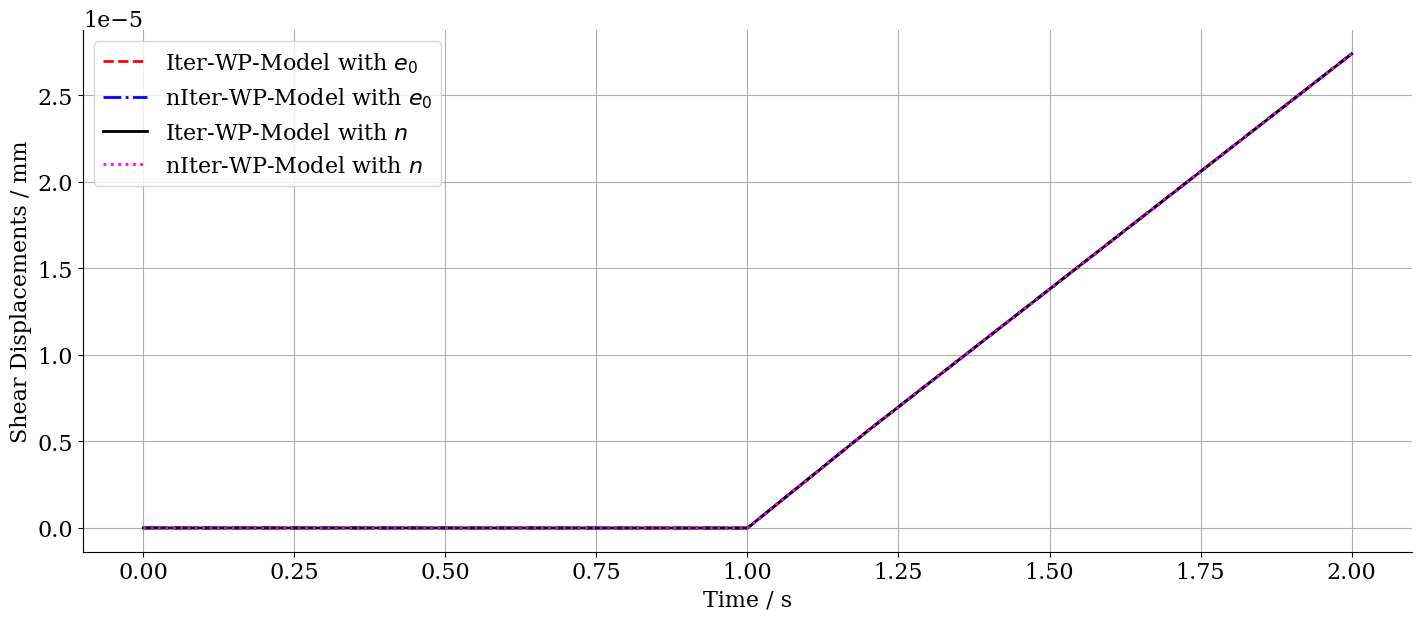

In [13]:
fig, ax = plt.subplots(figsize=(14.5, 6.5))
ax.plot(
    timeSteps_ubi_n_iter,
    results_ubi_n_iter["ShearDisplacement"]["pt1"].T[0],
    color="red",
    label="Iter-WP-Model with $e_0$",
    linestyle = "--"
)
ax.plot(
    timeSteps_ubi_n_niter,
    results_ubi_n_niter["ShearDisplacement"]["pt1"].T[0],
    color="blue",
    label="nIter-WP-Model with $e_0$",
    linestyle = "-."
)
ax.plot(
    timeSteps_ubi_e0_iter,
    results_ubi_e0_iter["ShearDisplacement"]["pt1"].T[0],
    color="black",
    label="Iter-WP-Model with $n$",
)
ax.plot(
    timeSteps_ubi_e0_niter,
    results_ubi_e0_niter["ShearDisplacement"]["pt1"].T[0],
    color="magenta",
    label="nIter-WP-Model with $n$",
    linestyle = ":"
)

ax.set_xlabel("Time / s")
ax.set_ylabel("Shear Displacements / mm")
ax.tick_params(axis="both", labelsize=16)
ax.grid(True)
ax.legend()
fig.tight_layout()

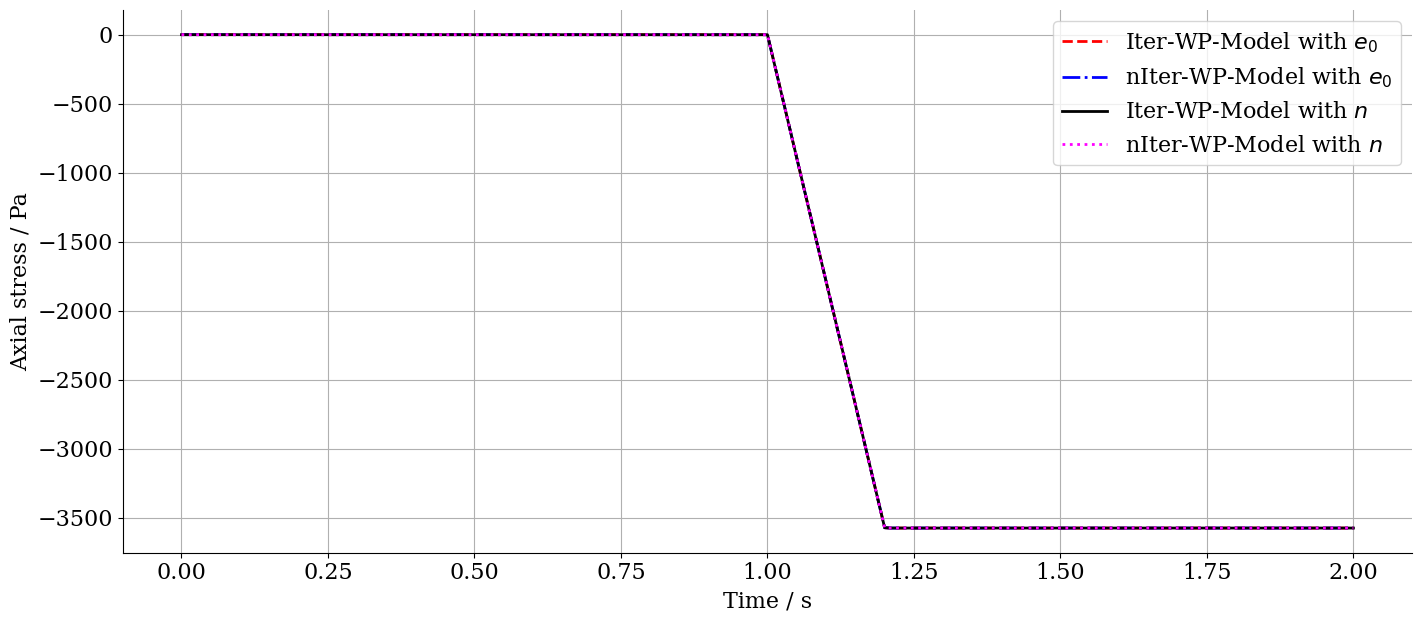

In [14]:
fig, ax = plt.subplots(figsize=(14.5, 6.5))
ax.plot(
    timeSteps_ubi_n_iter,
    results_ubi_n_iter["AxialStress"]["pt0"].T[1],
    color="red",
    label="Iter-WP-Model with $e_0$",
    linestyle = "--"
)
ax.plot(
    timeSteps_ubi_n_niter,
    results_ubi_n_niter["AxialStress"]["pt0"].T[1],
    color="blue",
    label="nIter-WP-Model with $e_0$",
    linestyle = "-."
)
ax.plot(
    timeSteps_ubi_e0_iter,
    results_ubi_e0_iter["AxialStress"]["pt0"].T[1],
    color="black",
    label="Iter-WP-Model with $n$",
    linestyle = "-"
)
ax.plot(
    timeSteps_ubi_e0_niter,
    results_ubi_e0_niter["AxialStress"]["pt0"].T[1],
    color="magenta",
    label="nIter-WP-Model with $n$",
    linestyle = ":"
)

ax.set_xlabel("Time / s")
ax.set_ylabel("Axial stress / Pa")
ax.tick_params(axis="both")
ax.grid(True)
ax.legend()
fig.tight_layout()

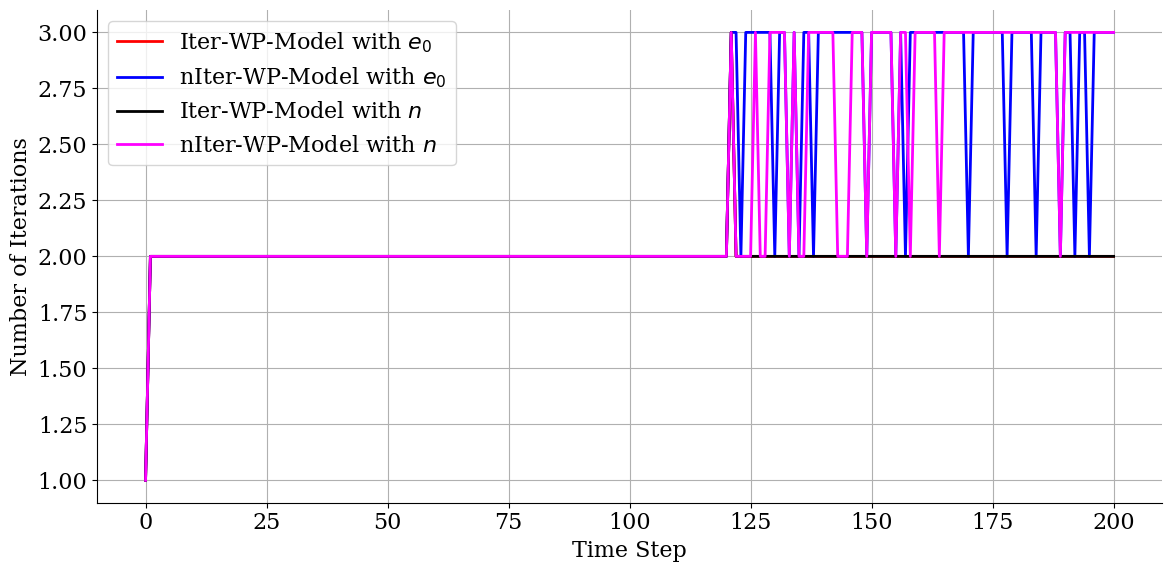

In [16]:
records_ubi_e0_iter_35 = ot.logparser.parse_file("./_out_ubi_e0_iter/out.txt")
df_records_ubi_e0_iter_35 = pd.DataFrame(records_ubi_e0_iter_35)
df_log_ubi_e0_iter_35 = ot.logparser.fill_ogs_context(df_records_ubi_e0_iter_35)
df_ts_it_ubi_e0_iter_35 = ot.logparser.time_step_vs_iterations(df_log_ubi_e0_iter_35)

records_ubi_e0_niter_35 = ot.logparser.parse_file("./_out_ubi_e0_niter/out.txt")
df_records_ubi_e0_niter_35 = pd.DataFrame(records_ubi_e0_niter_35)
df_log_ubi_e0_niter_35 = ot.logparser.fill_ogs_context(df_records_ubi_e0_niter_35)
df_ts_it_ubi_e0_niter_35 = ot.logparser.time_step_vs_iterations(df_log_ubi_e0_niter_35)

records_ubi_n_iter_35 = ot.logparser.parse_file("./_out_ubi_n_iter/out.txt")
df_records_ubi_n_iter_35 = pd.DataFrame(records_ubi_n_iter_35)
df_log_ubi_n_iter_35 = ot.logparser.fill_ogs_context(df_records_ubi_n_iter_35)
df_ts_it_ubi_n_iter_35 = ot.logparser.time_step_vs_iterations(df_log_ubi_n_iter_35)

records_ubi_n_niter_35 = ot.logparser.parse_file("./_out_ubi_n_niter/out.txt")
df_records_ubi_n_niter_35 = pd.DataFrame(records_ubi_n_niter_35)
df_log_ubi_n_niter_35 = ot.logparser.fill_ogs_context(df_records_ubi_n_niter_35)
df_ts_it_ubi_n_niter_35 = ot.logparser.time_step_vs_iterations(df_log_ubi_n_niter_35)


fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(
    df_ts_it_ubi_e0_iter_35.index,
    df_ts_it_ubi_e0_iter_35["iteration_number"],
    color="red",
    label="Iter-WP-Model with $e_0$",
)
ax.plot(
    df_ts_it_ubi_e0_niter_35.index,
    df_ts_it_ubi_e0_niter_35["iteration_number"],
    color="blue",
    label="nIter-WP-Model with $e_0$",
)
ax.plot(
    df_ts_it_ubi_n_iter_35.index,
    df_ts_it_ubi_n_iter_35["iteration_number"],
    color="black",
    label="Iter-WP-Model with $n$",
)
ax.plot(
    df_ts_it_ubi_n_niter_35.index,
    df_ts_it_ubi_n_niter_35["iteration_number"],
    color="magenta",
    label="nIter-WP-Model with $n$",
)

ax.set_xlabel("Time Step")
ax.set_ylabel("Number of Iterations")
ax.tick_params(axis="both")
ax.grid(True)
ax.legend()
fig.tight_layout()